# Data Visualization with Python

In this notebook you’ll get a broader coverage of the `Matplotlib` library and an overview of `seaborn`, a package for statistical graphics. Topics covered include customizing graphics, plotting two-dimensional arrays (like pseudocolor plots, contour plots, and images), statistical graphics (like visualizing distributions and regressions), and working with time series and image data.

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

## Simple Line Chart
To show trend(s).

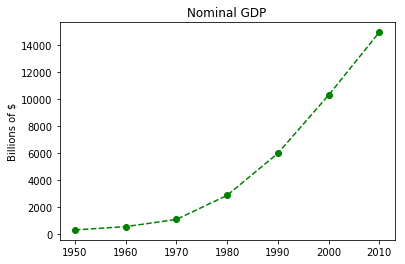

In [69]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(years, gdp, color='green', marker='o', linestyle='--')
plt.title("Nominal GDP")
plt.ylabel("Billions of $")
plt.savefig('images/viz_gdp.png')
plt.show();
#plt.gca().clear()

In [70]:
# clear the current figure so you can start fresh
plt.clf()

<Figure size 432x288 with 0 Axes>

## Line Charts

In [4]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]

In [5]:
total_error  = [x + y for x, y in zip(variance, bias_squared)]
total_error

[257, 130, 68, 40, 32, 40, 68, 130, 257]

In [6]:
# enumerate() puts variables into pairs
xs = [i for i in enumerate(variance)]
xs

[(0, 1), (1, 2), (2, 4), (3, 8), (4, 16), (5, 32), (6, 64), (7, 128), (8, 256)]

In [7]:
xs = [i for i, _ in enumerate(variance)]
xs

[0, 1, 2, 3, 4, 5, 6, 7, 8]

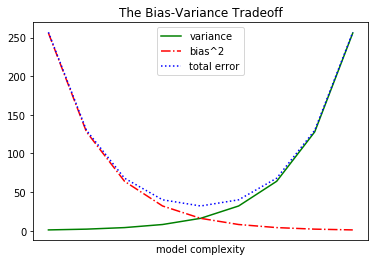

In [8]:
# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.savefig('images/viz_line_chart.png')
plt.show();

## Bar Chart
To show some quantity varies among some discrete set of items. 

In [9]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

In [10]:
r = range(len(movies))
r

range(0, 5)

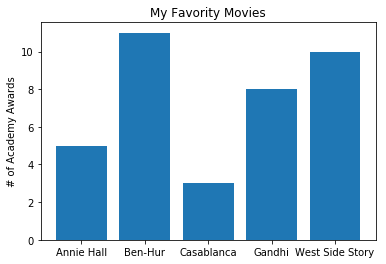

In [11]:
plt.bar(r, num_oscars)
plt.title("My Favority Movies")
plt.ylabel("# of Academy Awards")
plt.xticks(r, movies)
plt.savefig('images/viz_movies.png')
plt.show();

## Bar Chart
To plot histograms of bucketed numeric values, to visually explore how the values are distributed.

In [12]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

In [13]:
# The real floor division operator is “//”. 
# It returns floor value for both integer and floating point arguments.
100 // 10 * 10

100

In [14]:
min(grades[0] // 10 * 10, 90)

80

In [15]:
[min(grade // 10 * 10, 90) for grade in grades]

[80, 90, 90, 80, 70, 0, 80, 80, 90, 60, 70, 70, 0]

In [16]:
# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
histogram

Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})

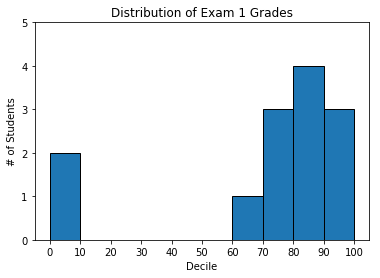

In [17]:
plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.savefig('images/viz_grades.png')
plt.show();

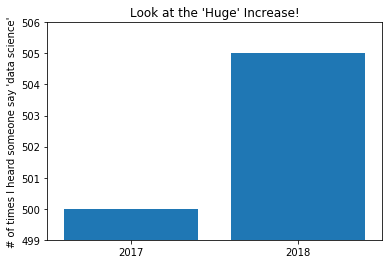

In [18]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.savefig('images/viz_misleading_y_axis.png')
plt.show();

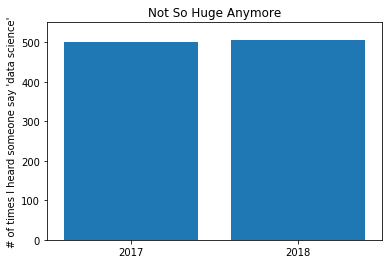

In [19]:
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)

plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.savefig('images/viz_non_misleading_y_axis.png')
plt.show();

## Histograms

To visually explore how the values are distributed (see also Bar Charts above)

In [51]:
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

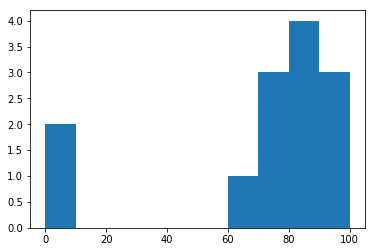

In [64]:
# Divide data into 10 bins (default)
plt.hist(grades)
plt.savefig('images/viz_grades_histogram.png')
plt.show();

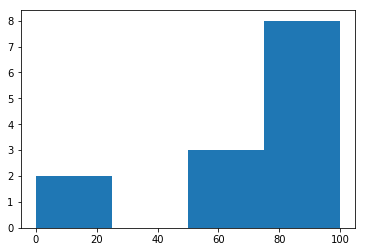

In [66]:
# Divide data into 4 bins
# Too few bins will oversimplify realiuty and won't show you the details.
# Too many bins will overcomplicate reality and won't show the bigger picture.
plt.hist(grades, bins=4)
plt.savefig('images/viz_grades_histogram_bins.png')
plt.show();

## Pyramids

see: https://github.com/afolaborn/Python_Jupyter_Notebook/blob/master/Population-Pyramid/Population_Pyramid_Final.ipynb

## Scatterplots
To visualize the relationship between two paired sets of data.

In [20]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

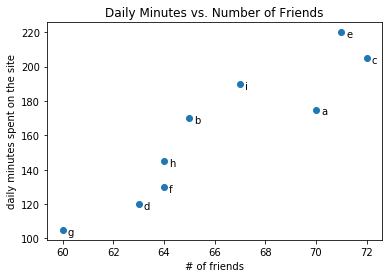

In [21]:
plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.savefig('images/viz_scatterplot.png')
plt.show();

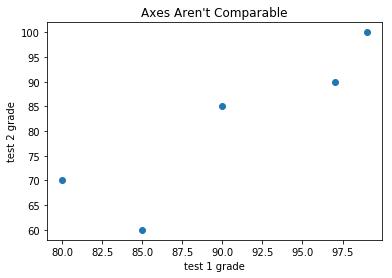

In [22]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_axes_not_comparable.png')
plt.show();

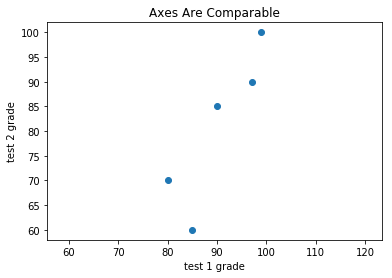

In [23]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.axis("equal")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_axes_comparable.png')
plt.show();

Logaritmic scale example

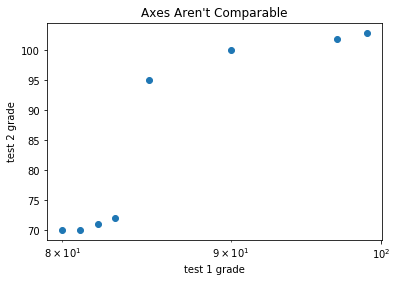

In [49]:
test_1_grades = [ 99, 90, 85, 97, 80, 81, 82, 83]
test_2_grades = [103, 100, 95, 102, 70, 70, 71, 72]

plt.scatter(test_1_grades, test_2_grades)
plt.xscale('log')
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_logaritmic_scale.png')
plt.show();

Dots sizes

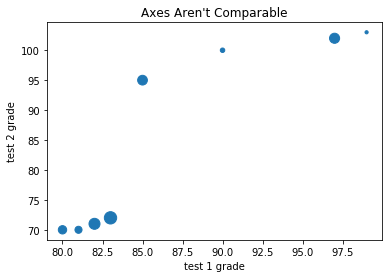

In [74]:
import numpy as np

test_1_grades = [ 99, 90, 85, 97, 80, 81, 82, 83]
test_2_grades = [103, 100, 95, 102, 70, 70, 71, 72]

sizes = [10, 20, 95, 102, 70, 50, 121, 152]

np_test_1_grades = np.array(test_1_grades)
np_test_2_grades = np.array(test_2_grades)

np_sizes = np_test_1_grades + np_test_2_grades + sizes

plt.scatter(test_1_grades, test_2_grades, s=sizes)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_dots_sizes.png')
plt.show();

In [93]:
#colors = [str(item/255.) for item in test_1_grades]
colors = sizes

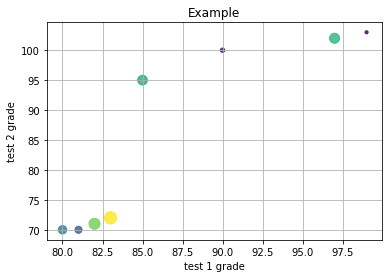

In [95]:
# Scatter plot
plt.scatter(x = test_1_grades, y = test_2_grades, s = sizes, c = colors, alpha = 0.8)

#plt.xscale('log') 
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.title('Example')
#plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Additional customizations
#plt.text(99, 71, 'Text Label 1')
#plt.text(80, 80, 'Text Label 2')

# Add grid() call
plt.grid(True)

plt.savefig('images/viz_scatterplot_dots_sizes_colors.png')
plt.show()

## Boxplot

To visualize summary statistics (summary statistics visual representation)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/tips5.csv')
print(df.shape)
df.head()

(244, 8)


,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


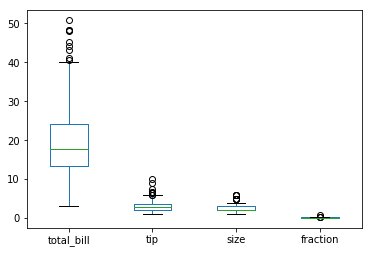

In [4]:
cols = ['total_bill','tip', 'size', 'fraction']
df[cols].plot(kind='box')
plt.show()

## Multiple plots on single axis

It is time now to put together some of what you have learned and combine line plots on a common set of axes. The data set here comes from records of undergraduate degrees awarded to women in a variety of fields from 1970 to 2011. You can compare trends in degrees most easily by viewing two curves on the same set of axes.

Here, three NumPy arrays have been pre-loaded for you: `year` (enumerating years from 1970 to 2011 inclusive), `physical_sciences` (representing the percentage of Physical Sciences degrees awarded to women each in corresponding year), and `computer_science` (representing the percentage of Computer Science degrees awarded to women in each corresponding year).

You will issue two `plt.plot()` commands to draw line plots of different colors on the same set of axes. Here, year represents the x-axis, while `physical_sciences` and `computer_science` are the y-axes.

In [4]:
import numpy as np

year = np.array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

physical_sciences = np.array([13.8, 14.9, 14.8, 16.5, 18.2, 19.1, 20. , 21.3, 22.5, 23.7, 24.6,
       25.7, 27.3, 27.6, 28. , 27.5, 28.4, 30.4, 29.7, 31.3, 31.6, 32.6,
       32.6, 33.6, 34.8, 35.9, 37.3, 38.3, 39.7, 40.2, 41. , 42.2, 41.1,
       41.7, 42.1, 41.6, 40.8, 40.7, 40.7, 40.7, 40.2, 40.1])

computer_science = np.array([13.6, 13.6, 14.9, 16.4, 18.9, 19.8, 23.9, 25.7, 28.1, 30.2, 32.5,
       34.8, 36.3, 37.1, 36.8, 35.7, 34.7, 32.4, 30.8, 29.9, 29.4, 28.7,
       28.2, 28.5, 28.5, 27.5, 27.1, 26.8, 27. , 28.1, 27.7, 27.6, 27. ,
       25.1, 22.2, 20.6, 18.6, 17.6, 17.8, 18.1, 17.6, 18.2])

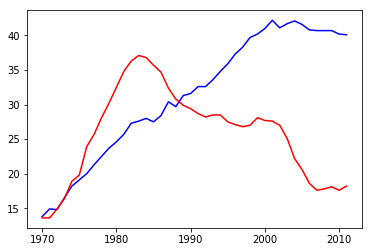

In [5]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')

# Display the plot
plt.show();

It looks like, for the last 25 years or so, more women have been awarded undergraduate degrees in the Physical Sciences than in Computer Science.

## Using axes()

Rather than overlaying line plots on common axes, you may prefer to plot different line plots on distinct axes. The command `plt.axes()` is one way to do this (but it requires specifying coordinates relative to the size of the figure).

Here, you have the same three arrays `year`, `physical_sciences`, and `computer_science` representing percentages of degrees awarded to women over a range of years. You will use `plt.axes()` to create separate sets of axes in which you will draw each line plot.

In calling `plt.axes([xlo, ylo, width, height])`, a set of axes is created and made active with lower corner at coordinates `(xlo, ylo)` of the specified width and height. Note that these coordinates can be passed to `plt.axes()` in the form of a list or a tuple.

The `coordinates` and `lengths` are values between 0 and 1 representing lengths relative to the dimensions of the figure. After issuing a `plt.axes()` command, plots generated are put in that set of axes.

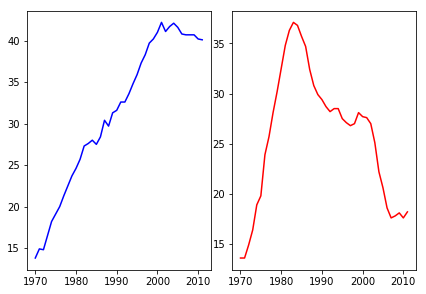

In [6]:
# Create plot axes for the first line plot
# plt.axes([xlo, ylo, width, height])
plt.axes([0.05, 0.05, 0.425, 0.9])

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')

# Create plot axes for the second line plot
plt.axes([0.525, 0.05, 0.425, 0.9])

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')

# Display the plot
plt.show();

As you can see, not only are there now two separate plots with their own axes, but the axes for each plot are slightly different.

## Using subplot() (1)

The command `plt.axes()` requires a lot of effort to use well because the coordinates of the axes need to be set manually. A better alternative is to use `plt.subplot()` to determine the layout automatically.

In this exercise, you will continue working with the same arrays from the previous exercises: `year`, `physical_sciences`, and `computer_science`. Rather than using `plt.axes()` to explicitly lay out the axes, you will use `plt.subplot(m, n, k)` to make the subplot grid of dimensions `m` by `n` and to make the `k`th subplot active (subplots are numbered starting from 1 row-wise from the top left corner of the subplot grid).

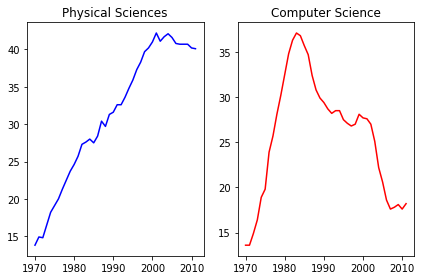

In [7]:
# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1, 2, 1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1, 2, 2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show();

Using subplots like this is a better alternative to using `plt.axes()`.

## Using subplot() (2)

Now you have some familiarity with `plt.subplot()`, you can use it to plot more plots in larger grids of subplots of the same figure.

Here, you will make a 2×2 grid of subplots and plot the percentage of degrees awarded to women in Physical Sciences (using `physical_sciences`), in Computer Science (using `computer_science`), in Health Professions (using `health`), and in Education (using `education`).

In [8]:
health = np.array([77.1, 75.5, 76.9, 77.4, 77.9, 78.9, 79.2, 80.5, 81.9, 82.3, 83.5,
       84.1, 84.4, 84.6, 85.1, 85.3, 85.7, 85.5, 85.2, 84.6, 83.9, 83.5,
       83. , 82.4, 81.8, 81.5, 81.3, 81.9, 82.1, 83.5, 83.5, 85.1, 85.8,
       86.5, 86.5, 86. , 85.9, 85.4, 85.2, 85.1, 85. , 84.8])

education = np.array([74.53532758, 74.14920369, 73.55451996, 73.50181443, 73.33681143,
       72.80185448, 72.16652471, 72.45639481, 73.19282134, 73.82114234,
       74.98103152, 75.84512345, 75.84364914, 75.95060123, 75.86911601,
       75.92343971, 76.14301516, 76.96309168, 77.62766177, 78.11191872,
       78.86685859, 78.99124597, 78.43518191, 77.26731199, 75.81493264,
       75.12525621, 75.03519921, 75.1637013 , 75.48616027, 75.83816206,
       76.69214284, 77.37522931, 78.64424394, 78.54494815, 78.65074774,
       79.06712173, 78.68630551, 78.72141311, 79.19632674, 79.5329087 ,
       79.61862451, 79.43281184])

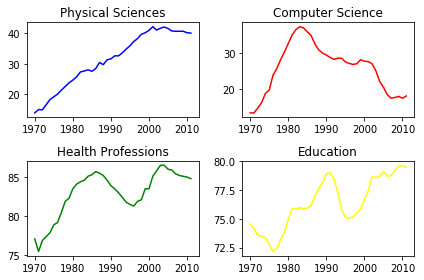

In [9]:
# Create a figure with 2x2 subplot layout and make the top left subplot active
plt.subplot(2, 2, 1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the top right subplot active in the current 2x2 subplot grid 
plt.subplot(2, 2, 2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2, 2, 3)

# Plot in green the % of degrees awarded to women in Health Professions
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Make the bottom right subplot active in the current 2x2 subplot grid
plt.subplot(2, 2, 4)

# Plot in yellow the % of degrees awarded to women in Education
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show();

You can use this approach to create subplots in any layout of your choice.

## Using xlim(), ylim()

In this exercise, you will work with the `matplotlib.pyplot` interface to quickly set the x- and y-limits of your plots.

You will now create the same figure as in the previous exercise using `plt.plot()`, this time setting the axis extents using `plt.xlim()` and `plt.ylim()`. These commands allow you to either **zoom or expand the plot or to set the axis ranges to include important values (such as the origin)**.

In this exercise, as before, the percentage of women graduates in Computer Science and in the Physical Sciences are held in the variables `computer_science` and `physical_sciences` respectively over year.

After creating the plot, you will use `plt.savefig()` to export the image produced to a file.

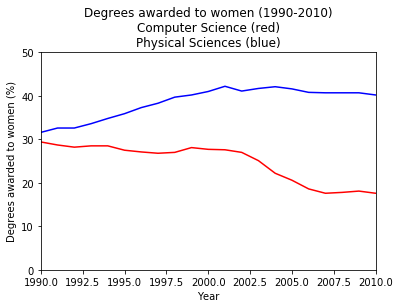

In [12]:
# Plot the % of degrees awarded to women in Computer Science and the Physical Sciences
plt.plot(year,computer_science, color='red') 
plt.plot(year, physical_sciences, color='blue')

# Add the axis labels
plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')

# Set the x-axis range
plt.xlim(1990, 2010)

# Set the y-axis range
plt.ylim(0, 50)

# Add a title
plt.title('Degrees awarded to women (1990-2010)\nComputer Science (red)\nPhysical Sciences (blue)')

# Save the image as 'xlim_and_ylim.png'
plt.savefig('images/xlim_and_ylim.png')

# Display the plot
plt.show();

This plot effectively captures the difference in trends between 1990 and 2010.

## Using axis()

Using `plt.xlim()` and `plt.ylim()` are useful for setting the axis limits individually. In this exercise, you will see how you can pass a 4-tuple to `plt.axis()` to set limits for both axes at once. For example, `plt.axis((1980,1990,0,75))` would set the extent of the x-axis to the period between 1980 and 1990, and would set the y-axis extent from 0 to 75% degrees award.

Once again, the percentage of women graduates in Computer Science and in the Physical Sciences are held in the variables `computer_science` and `physical_sciences` where each value was measured at the corresponding year held in the `year` variable.

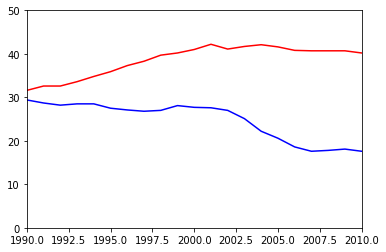

In [13]:
# Plot in blue the % of degrees awarded to women in Computer Science
plt.plot(year,computer_science, color='blue')

# Plot in red the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences,color='red')

# Set the x-axis and y-axis limits
plt.axis((1990,2010,0,50))

# Show the figure
plt.show();

# Save the figure as 'axis_limits.png'
#plt.savefig('images/axis_limits.png')

## Using legend()

Legends are useful for distinguishing between multiple datasets displayed on common axes. The relevant data are created using specific line colors or markers in various plot commands. Using the keyword argument `label` in the plotting function associates a string to use in a legend.

For example, here, you will plot enrollment of women in the Physical Sciences and in Computer Science over time. You can label each curve by passing a label argument to the plotting call, and request a legend using `plt.legend()`. Specifying the keyword argument `loc` determines where the legend will be placed.

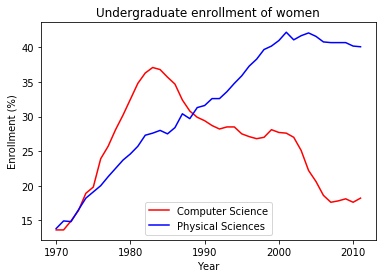

In [14]:
# Specify the label 'Computer Science'
plt.plot(year, computer_science, color='red', label='Computer Science') 

# Specify the label 'Physical Sciences' 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')

# Add a legend at the lower center
plt.legend(loc='lower center')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show();

You should always use axes labels and legends to help make your plots more readable.

## Using annotate()

It is often useful to annotate a simple plot to provide context. This makes the plot more readable and can highlight specific aspects of the data. Annotations like text and arrows can be used to emphasize specific observations.

Here, you will once again plot enrollment of women in the Physical Sciences and Computer science over time. The legend is set up as before. Additionally, you will mark the inflection point when enrollment of women in Computer Science reached a peak and started declining using `plt.annotate()`.

To enable an arrow, set `arrowprops=dict(facecolor='black')`. The arrow will point to the location given by `xy` and the text will appear at the location given by `xytext`.

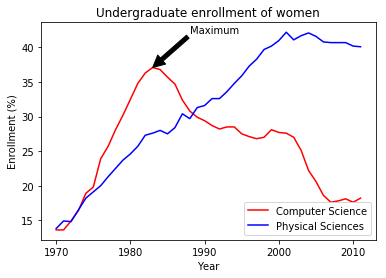

In [15]:
# Plot with legend as before
plt.plot(year, computer_science, color='red', label='Computer Science') 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')
plt.legend(loc='lower right')

# Compute the maximum enrollment of women in Computer Science: cs_max
cs_max = computer_science.max()

# Calculate the year in which there was maximum enrollment of women in Computer Science: yr_max
yr_max = year[computer_science.argmax()]

# Add a black arrow annotation
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max+5, cs_max+5), arrowprops=dict(facecolor='black'))

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show();

## Modifying styles

Matplotlib comes with a number of different stylesheets to customize the overall look of different plots. To activate a particular stylesheet you can simply call `plt.style.use()` with the name of the style sheet you want. To list all the available style sheets you can execute: `print(plt.style.available)`.

In [17]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


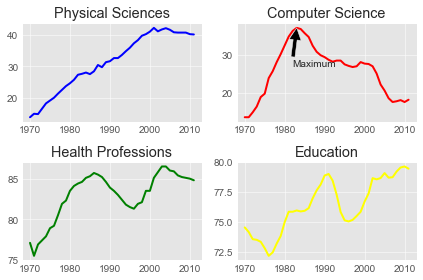

In [21]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set the style to 'ggplot'
plt.style.use('ggplot')

# Create a figure with 2x2 subplot layout
plt.subplot(2, 2, 1) 

# Plot the enrollment % of women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Plot the enrollment % of women in Computer Science
plt.subplot(2, 2, 2)
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Add annotation
cs_max = computer_science.max()
yr_max = year[computer_science.argmax()]
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max-1, cs_max-10), arrowprops=dict(facecolor='black'))

# Plot the enrollmment % of women in Health professions
plt.subplot(2, 2, 3)
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Plot the enrollment % of women in Education
plt.subplot(2, 2, 4)
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve spacing between subplots and display them
plt.tight_layout()
plt.show();

## Generating meshes

In order to visualize two-dimensional arrays of data, it is necessary to understand how to generate and manipulate 2-D arrays. Many Matplotlib plots support arrays as input and in particular, they support NumPy arrays. The NumPy library is the most widely-supported means for supporting numeric arrays in Python.

In this exercise, you will use the `meshgrid` function in NumPy to generate 2-D arrays which you will then visualize using `plt.imshow()`. The simplest way to generate a meshgrid is as follows:

In [22]:
import numpy as np
Y,X = np.meshgrid(range(10),range(20))

This will create two arrays with a shape of (20,10), which corresponds to 20 rows along the Y-axis and 10 columns along the X-axis. In this exercise, you will use `np.meshgrid()` to generate a regular 2-D sampling of a mathematical function.

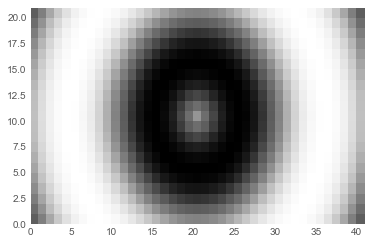

In [23]:
# Import numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

# Generate two 1-D arrays: u, v
# Generate two one-dimensional arrays u and v using np.linspace(). 
#  The array u should contain 41 values uniformly spaced beween -2 and +2. 
#  The array v should contain 21 values uniformly spaced between -1 and +1.
u = np.linspace(-2, 2, 41)
v = np.linspace(-1, 1, 21)

# Generate 2-D arrays from u and v: X, Y
# The resulting arrays should have shape (41,21)
X,Y = np.meshgrid(u,v)

# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

# Display the resulting image with pcolor()
plt.pcolor(Z)
plt.show();

# Save the figure to 'sine_mesh.png'
#plt.savefig('sine_mesh.png')

## Array orientation

<img src="images/matrix-01.png" alt="" style="width: 400px;"/>

The commands

- In [1]: plt.pcolor(A, cmap='Blues')
- In [2]: plt.colorbar()
- In [3]: plt.show()

produce the pseudocolor plot above using a Numpy array A. Which of the commands below could have generated A?

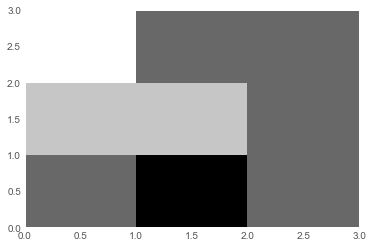

In [24]:
A = np.array([[1, 2, 1], [0, 0, 1], [-1, 1, 1]])
plt.pcolor(A)
plt.show();

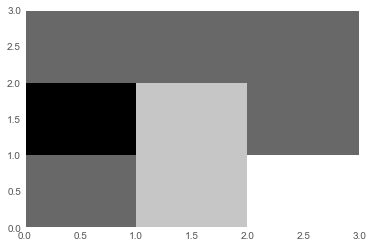

In [25]:
# Correct answer
A = np.array([[1, 0, -1], [2, 0, 1], [1, 1, 1]])
plt.pcolor(A)
plt.show();

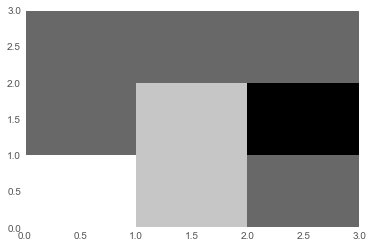

In [26]:
A = np.array([[-1, 0, 1], [1, 0, 2], [1, 1, 1]])
plt.pcolor(A)
plt.show();

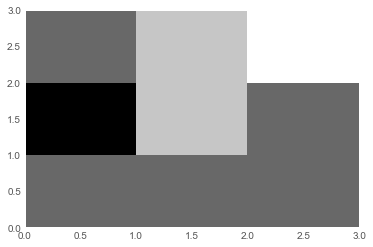

In [27]:
A = np.array([[1, 1, 1], [2, 0, 1], [1, 0, -1]])
plt.pcolor(A)
plt.show();